Copyright 2025 Tsung-Tang Lee (also known as Osborn Lee or Moe)

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

特別聲明：
禁止修改本程式碼後，聲稱為自己原創或作者。
修改後的作品必須保留原作者資訊

In [ ]:
import os
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.18.0
Num GPUs Available: 1


In [ ]:
!nvidia-smi

Sun Jul 20 09:17:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             12W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
batch_size = 128
num_classes = 10
epochs = 100
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# build CNN model
model = Sequential([
    Conv2D(64, (3, 3), padding='same',input_shape=x_train.shape[1:]),
    Activation('relu'),
    Conv2D(128, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same'),
    Activation('relu'),
    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
])

print(model.summary())

# initiate Adam optimizer
opt = Adam()

# train model by optimizer Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.


print('data augmentation')
# Tpreprocessing : data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,    # 訓練前，會被隨機旋轉 ±30 度之間的某個角度
    width_shift_range=0.1,  # 每張圖片在訓練前，會被隨機水平平移 ±10% 圖片寬度的距離
    height_shift_range=0.1,  # 每張圖片在訓練前，會被隨機上下平移 ±10% 圖片高度的距離
    horizontal_flip=True,   # 訓練時，每張圖片有機會被隨機水平翻轉（左右翻轉）
    vertical_flip=False)   # 在資料增強時，不執行垂直翻轉（上下顛倒）的操作

# Use ModelCheckpoint to save the best performance model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)

# no earlystop
# Model fit
model_history = model.fit(datagen.flow(x_train, y_train,
                    batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint],
                    )

# loading saved model that trained below
print("Loading trained model")
model = load_model(model_path)

# Score trained model by accuracy and loss
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,371,658 (5.23 MB)

 Trainable params: 1,371,658 (5.23 MB)

 Non-trainable params: 0 (0.00 B)

None
Using real-time data augmentation.
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.2825 - loss: 1.9232
Epoch 1: val_loss improved from inf to 1.34125, saving model to /content/saved_models/keras_cifar10_trained_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 101ms/step - accuracy: 0.2827 - loss: 1.9227 - val_accuracy: 0.5159 - val_loss: 1.3413
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4923 - loss: 1.4054
Epoch 2: val_loss improved from 1.34125 to 1.20162, saving model to /content/saved_models/keras_cifar10_trained_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.4923 - loss: 1.4052 - val_accuracy: 0.5811 - val_loss: 1.2016
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5570 - loss: 1.2573
Epoch 3: val_loss improved from 1.20162 to 1.09329, saving model to /content/saved_models/keras_cifar10_trained_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 82ms/step - accuracy: 0.5570 - loss: 1.2572 - val_accuracy: 0.6117 - val_loss: 1.0933
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5849 - loss: 1.1615
Epoch 4: val_loss improved from 1.09329 to 1.04761, saving model to /content/saved_models/keras_cifar10_trained_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.5849 - loss: 1.1614 - val_accuracy: 0.6308 - val_loss: 1.0476
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6088 - loss: 1.1054
Epoch 5: val_loss improved from 1.04761 to 1.00803, saving model to /content/saved_models/keras_cifar10_trained_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.6088 - loss: 1.1054 - val_accuracy: 0.6539 - val_loss: 1.0080
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6308 - loss: 1.0487
Epoch 6: val_loss did not improve from 1.00803
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.6308 - loss: 1.0487 - val_accuracy: 0.6364 - val_loss: 1.0445
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6408 - loss: 1.0129
Epoch 7: val_loss improved from 1.00803 to 0.92458, saving model to /content/saved_models/keras_cifar10_trained_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.6408 - loss: 1.0128 - val_accuracy: 0.6860 - val_loss: 0.9246
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6589 - loss: 0.9784
Epoch 8: val_loss did not improve from 0.92458
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.6589 - loss: 0.9783 - val_accuracy: 0.6826 - val_loss: 0.9290
Epoch 9/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6691 - loss: 0.9495
Epoch 9: val_loss improved from 0.92458 to 0.76523, saving model to /content/saved_models/keras_cifar10_trained_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.6691 - loss: 0.9495 - val_accuracy: 0.7342 - val_loss: 0.7652
Epoch 10/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6782 - loss: 0.9183
Epoch 10: val_loss did not improve from 0.76523
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.6783 - loss: 0.9183 - val_accuracy: 0.6991 - val_loss: 0.8902
Epoch 11/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6819 - loss: 0.9099
Epoch 11: val_loss did not improve from 0.76523
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.6819 - loss: 0.9099 - val_accuracy: 0.7209 - val_loss: 0.8039
Epoch 12/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6843 - loss: 0.8978
Epoch 12: val_loss did not improve from 0.76523
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.6844 - loss: 0.8977 - val_accuracy: 0.7181 - val_loss: 0.8404
Epoch 13/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6959 - loss: 0.8619
Epoch 13: val_loss did n

391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.7052 - loss: 0.8425 - val_accuracy: 0.7467 - val_loss: 0.7477
Epoch 15/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7110 - loss: 0.8261
Epoch 15: val_loss improved from 0.74771 to 0.73143, saving model to /content/saved_models/keras_cifar10_trained_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7110 - loss: 0.8261 - val_accuracy: 0.7458 - val_loss: 0.7314
Epoch 16/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7133 - loss: 0.8242
Epoch 16: val_loss improved from 0.73143 to 0.71372, saving model to /content/saved_models/keras_cifar10_trained_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7133 - loss: 0.8242 - val_accuracy: 0.7535 - val_loss: 0.7137
Epoch 17/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7150 - loss: 0.8156
Epoch 17: val_loss did not improve from 0.71372
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.7150 - loss: 0.8156 - val_accuracy: 0.7500 - val_loss: 0.7370
Epoch 18/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7223 - loss: 0.7988
Epoch 18: val_loss improved from 0.71372 to 0.67178, saving model to /content/saved_models/keras_cifar10_trained_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.7223 - loss: 0.7988 - val_accuracy: 0.7709 - val_loss: 0.6718
Epoch 19/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7256 - loss: 0.7933
Epoch 19: val_loss did not improve from 0.67178
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.7256 - loss: 0.7933 - val_accuracy: 0.7612 - val_loss: 0.6927
Epoch 20/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7213 - loss: 0.7942
Epoch 20: val_loss improved from 0.67178 to 0.66095, saving model to /content/saved_models/keras_cifar10_trained_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.7213 - loss: 0.7942 - val_accuracy: 0.7733 - val_loss: 0.6610
Epoch 21/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7262 - loss: 0.7836
Epoch 21: val_loss improved from 0.66095 to 0.64918, saving model to /content/saved_models/keras_cifar10_trained_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.7262 - loss: 0.7836 - val_accuracy: 0.7774 - val_loss: 0.6492
Epoch 22/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7288 - loss: 0.7746
Epoch 22: val_loss did not improve from 0.64918
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.7288 - loss: 0.7746 - val_accuracy: 0.7545 - val_loss: 0.7321
Epoch 23/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7366 - loss: 0.7517
Epoch 23: val_loss did not improve from 0.64918
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 81ms/step - accuracy: 0.7366 - loss: 0.7518 - val_accuracy: 0.7565 - val_loss: 0.7095
Epoch 24/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7377 - loss: 0.7582
Epoch 24: val_loss did not improve from 0.64918
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.7377 - loss: 0.7582 - val_accuracy: 0.7785 - val_loss: 0.6613
Epoch 25/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7453 - loss: 0.7357
Epoch 25: val_loss did n

391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7455 - loss: 0.7416 - val_accuracy: 0.7863 - val_loss: 0.6247
Epoch 28/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7430 - loss: 0.7368
Epoch 28: val_loss did not improve from 0.62472
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.7430 - loss: 0.7368 - val_accuracy: 0.7740 - val_loss: 0.6769
Epoch 29/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7423 - loss: 0.7371
Epoch 29: val_loss did not improve from 0.62472
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.7424 - loss: 0.7371 - val_accuracy: 0.7877 - val_loss: 0.6359
Epoch 30/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7466 - loss: 0.7280
Epoch 30: val_loss did not improve from 0.62472
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.7466 - loss: 0.7280 - val_accuracy: 0.7854 - val_loss: 0.6479
Epoch 31/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7526 - loss: 0.7205
Epoch 31: val_loss did n

391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7603 - loss: 0.6965 - val_accuracy: 0.7942 - val_loss: 0.6080
Epoch 36/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7560 - loss: 0.6976
Epoch 36: val_loss did not improve from 0.60801
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 80ms/step - accuracy: 0.7560 - loss: 0.6976 - val_accuracy: 0.7914 - val_loss: 0.6293
Epoch 37/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7586 - loss: 0.6905
Epoch 37: val_loss did not improve from 0.60801
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7586 - loss: 0.6905 - val_accuracy: 0.7931 - val_loss: 0.6230
Epoch 38/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7622 - loss: 0.6933
Epoch 38: val_loss did not improve from 0.60801
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.7622 - loss: 0.6933 - val_accuracy: 0.7850 - val_loss: 0.6415
Epoch 39/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7594 - loss: 0.6859
Epoch 39: val_loss did n

391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.7645 - loss: 0.6758 - val_accuracy: 0.8039 - val_loss: 0.5890
Epoch 41/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7659 - loss: 0.6733
Epoch 41: val_loss did not improve from 0.58898
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.7659 - loss: 0.6733 - val_accuracy: 0.7895 - val_loss: 0.6233
Epoch 42/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7639 - loss: 0.6771
Epoch 42: val_loss did not improve from 0.58898
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7639 - loss: 0.6771 - val_accuracy: 0.7939 - val_loss: 0.6068
Epoch 43/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7635 - loss: 0.6860
Epoch 43: val_loss improved from 0.58898 to 0.57717, saving model to /content/saved_models/keras_cifar10_trained_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.7635 - loss: 0.6859 - val_accuracy: 0.8071 - val_loss: 0.5772
Epoch 44/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7680 - loss: 0.6678
Epoch 44: val_loss did not improve from 0.57717
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7680 - loss: 0.6678 - val_accuracy: 0.7897 - val_loss: 0.6292
Epoch 45/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7684 - loss: 0.6680
Epoch 45: val_loss did not improve from 0.57717
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7684 - loss: 0.6680 - val_accuracy: 0.8004 - val_loss: 0.5977
Epoch 46/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7718 - loss: 0.6572
Epoch 46: val_loss did not improve from 0.57717
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7717 - loss: 0.6572 - val_accuracy: 0.7823 - val_loss: 0.6518
Epoch 47/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7722 - loss: 0.6615
Epoch 47: val_loss did n

391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7747 - loss: 0.6557 - val_accuracy: 0.8088 - val_loss: 0.5659
Epoch 52/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7758 - loss: 0.6509
Epoch 52: val_loss did not improve from 0.56586
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.7757 - loss: 0.6509 - val_accuracy: 0.7897 - val_loss: 0.6309
Epoch 53/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7770 - loss: 0.6471
Epoch 53: val_loss did not improve from 0.56586
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.7769 - loss: 0.6471 - val_accuracy: 0.8053 - val_loss: 0.5838
Epoch 54/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7766 - loss: 0.6456
Epoch 54: val_loss did not improve from 0.56586
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7766 - loss: 0.6456 - val_accuracy: 0.8050 - val_loss: 0.5868
Epoch 55/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7748 - loss: 0.6485
Epoch 55: val_loss did n

391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.7798 - loss: 0.6323 - val_accuracy: 0.8104 - val_loss: 0.5605
Epoch 59/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7814 - loss: 0.6301
Epoch 59: val_loss did not improve from 0.56050
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7813 - loss: 0.6301 - val_accuracy: 0.8078 - val_loss: 0.5730
Epoch 60/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7795 - loss: 0.6369
Epoch 60: val_loss did not improve from 0.56050
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.7795 - loss: 0.6369 - val_accuracy: 0.7901 - val_loss: 0.6200
Epoch 61/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7780 - loss: 0.6403
Epoch 61: val_loss did not improve from 0.56050
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.7780 - loss: 0.6402 - val_accuracy: 0.8084 - val_loss: 0.5652
Epoch 62/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7811 - loss: 0.6253
Epoch 62: val_loss did n

391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7846 - loss: 0.6271 - val_accuracy: 0.8177 - val_loss: 0.5415
Epoch 64/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7818 - loss: 0.6243
Epoch 64: val_loss did not improve from 0.54151
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.7818 - loss: 0.6243 - val_accuracy: 0.8107 - val_loss: 0.5719
Epoch 65/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7852 - loss: 0.6200
Epoch 65: val_loss did not improve from 0.54151
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.7852 - loss: 0.6200 - val_accuracy: 0.8157 - val_loss: 0.5431
Epoch 66/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7819 - loss: 0.6322
Epoch 66: val_loss did not improve from 0.54151
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7819 - loss: 0.6322 - val_accuracy: 0.7982 - val_loss: 0.6234
Epoch 67/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7792 - loss: 0.6345
Epoch 67: val_loss did n

391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.7895 - loss: 0.6067 - val_accuracy: 0.8296 - val_loss: 0.5230
Epoch 77/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7883 - loss: 0.6121
Epoch 77: val_loss did not improve from 0.52299
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.7883 - loss: 0.6122 - val_accuracy: 0.8011 - val_loss: 0.6189
Epoch 78/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7854 - loss: 0.6208
Epoch 78: val_loss improved from 0.52299 to 0.51429, saving model to /content/saved_models/keras_cifar10_trained_model.h5


391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.7854 - loss: 0.6208 - val_accuracy: 0.8286 - val_loss: 0.5143
Epoch 79/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7912 - loss: 0.6050
Epoch 79: val_loss did not improve from 0.51429
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.7912 - loss: 0.6050 - val_accuracy: 0.7965 - val_loss: 0.6533
Epoch 80/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7919 - loss: 0.6118
Epoch 80: val_loss did not improve from 0.51429
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7919 - loss: 0.6118 - val_accuracy: 0.8204 - val_loss: 0.5460
Epoch 81/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7938 - loss: 0.5945
Epoch 81: val_loss did not improve from 0.51429
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.7938 - loss: 0.5946 - val_accuracy: 0.8192 - val_loss: 0.5443
Epoch 82/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7909 - loss: 0.6025
Epoch 82: val_loss did n

391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.7962 - loss: 0.5964 - val_accuracy: 0.8318 - val_loss: 0.4976
Epoch 94/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7956 - loss: 0.5890
Epoch 94: val_loss did not improve from 0.49764
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.7956 - loss: 0.5890 - val_accuracy: 0.8219 - val_loss: 0.5431
Epoch 95/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7995 - loss: 0.5821
Epoch 95: val_loss did not improve from 0.49764
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.7995 - loss: 0.5821 - val_accuracy: 0.8211 - val_loss: 0.5379
Epoch 96/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7950 - loss: 0.5902
Epoch 96: val_loss did not improve from 0.49764
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.7950 - loss: 0.5902 - val_accuracy: 0.8144 - val_loss: 0.5547
Epoch 97/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7929 - loss: 0.5911
Epoch 97: val_loss did n

Loading trained model
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8319 - loss: 0.4964
Test loss: 0.4976378381252289
Test accuracy: 0.8317999839782715


In [ ]:
model_path_test = os.path.join(os.getcwd(), 'saved_models', 'keras_cifar10_trained_model.h5')
if os.path.exists(model_path_test):
    print("✅ 模型已成功儲存於：", model_path_test)
else:
    print("❌ 模型尚未儲存，請檢查訓練是否完成或資料夾是否建立。")

✅ 模型已成功儲存於： /content/saved_models/keras_cifar10_trained_model.h5


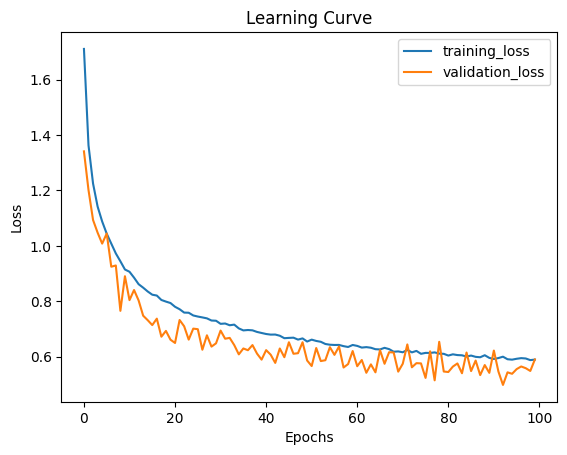

In [ ]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

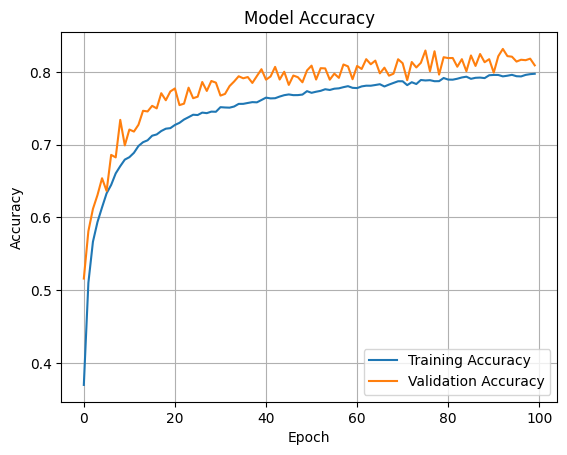

In [ ]:
training_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy']

plt.plot(training_loss, label='Training Accuracy')
plt.plot(val_loss, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

 **Copy model we trained before to Google Drive.**

**Next time, you can use the model we trained before directly for prediction.**

In [ ]:
# 掛載使用者的Google雲端硬碟 (drive/MyDrive) 到 Colab 的工作磁碟
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

In [ ]:
print(os.listdir(Path.cwd()))

print(Path.cwd())

print(os.listdir(Path.cwd() / 'saved_models'))

print(os.listdir(Path.cwd() / 'drive'))

['.config', 'drive', 'saved_models', 'sample_data']
/content
['keras_cifar10_trained_model.h5']
['MyDrive', '.shortcut-targets-by-id', '.Trash-0', '.Encrypted']


In [ ]:
target_path = Path.cwd() / 'drive' / 'MyDrive' / 'keras_cifar10_trained_model_No_Stopping.h5'
source_path = Path.cwd() / 'saved_models' / model_name

shutil.move(source_path, target_path)

PosixPath('/content/drive/MyDrive/keras_cifar10_trained_model_No_Stopping.h5')